In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
url1 = 'C:\\Users\\86152\\Desktop\\Bit_predicted.xlsx'
data_bit = pd.read_excel(url1)


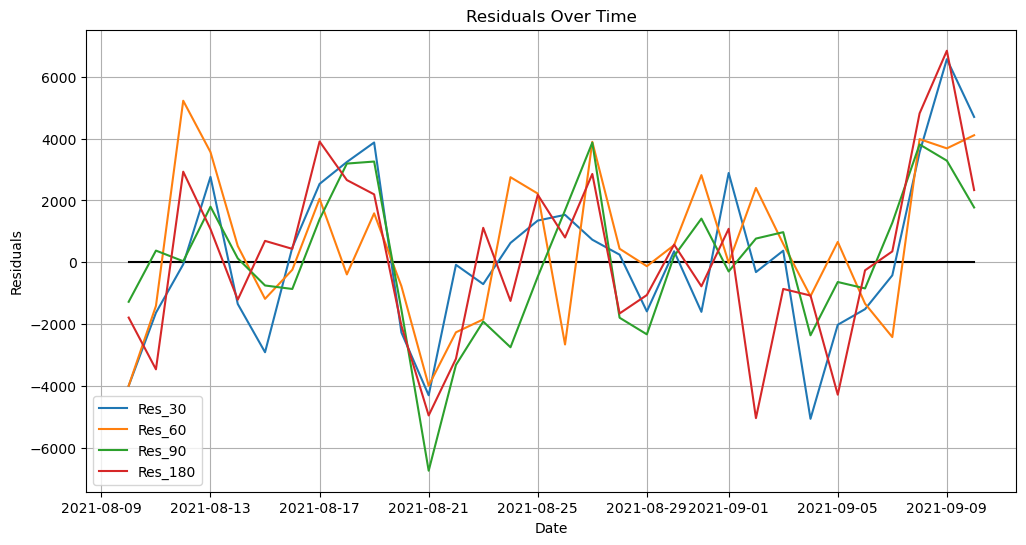

In [3]:
data_cleaned = data_bit[data_bit['Date'] != 'abs']
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Re-plot the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], np.zeros(len(data_cleaned['Res_30'])),color='black')
plt.plot(data_cleaned['Date'], data_cleaned['Res_30'], label='Res_30')
plt.plot(data_cleaned['Date'], data_cleaned['Res_60'], label='Res_60')
plt.plot(data_cleaned['Date'], data_cleaned['Res_90'], label='Res_90')
plt.plot(data_cleaned['Date'], data_cleaned['Res_180'], label='Res_180')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.grid()
plt.show()


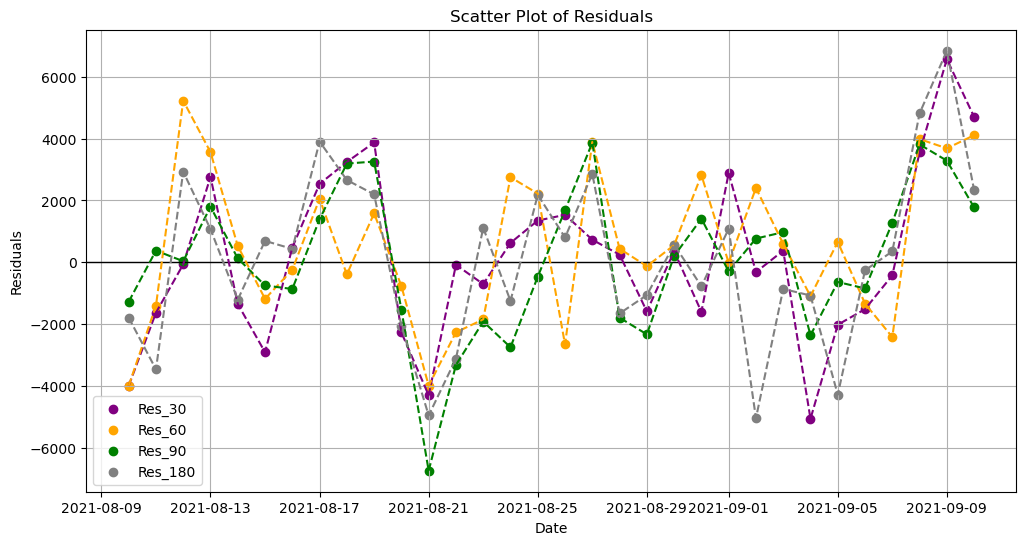

In [4]:
plt.figure(figsize=(12, 6))
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.scatter(data_cleaned['Date'], data_cleaned['Res_30'], label='Res_30', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Res_30'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_60'], label='Res_60', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Res_60'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_90'], label='Res_90', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Res_90'], linestyle='--', color='green')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_180'], label='Res_180', color='gray')
plt.plot(data_cleaned['Date'], data_cleaned['Res_180'], linestyle='--', color='gray')

# Add labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.legend()
plt.grid()
plt.show()


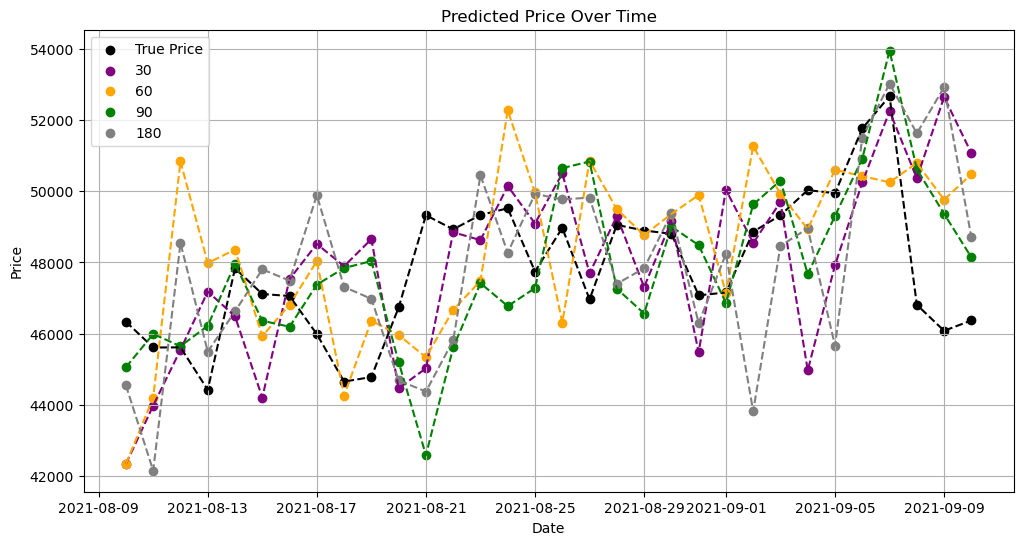

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['Date'], data_cleaned['Value'], label='True Price', color='black')
plt.plot(data_cleaned['Date'], data_cleaned['Value'], linestyle='--', color='black')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (30)'], label='30', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (30)'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (60)'], label='60', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (60)'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (90)'], label='90', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (90)'], linestyle='--', color='green')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (180)'], label='180', color='gray')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (180)'], linestyle='--', color='gray')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Price Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predicted_values_gold_30 = data_cleaned['Predicted Value (30)']
predicted_values_gold_60 = data_cleaned['Predicted Value (60)']
predicted_values_gold_90 = data_cleaned['Predicted Value (90)']
predicted_values_gold_180 = data_cleaned['Predicted Value (180)']

# Initialize a results list
results_gold_all = []

# Function to calculate metrics for a given prediction
def calculate_metrics(true_values, predicted_values, horizon):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    directional_accuracy = (np.sign(true_values.diff()) == np.sign(predicted_values.diff())).mean()
    return {'Horizon': horizon, 'MAE': mae, 'RMSE': rmse, 'R^2': r2, 'Directional Accuracy': directional_accuracy}

true_values_gold_new = data_cleaned['Value']

# Calculate for each horizon and append results
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_30, '30 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_60, '60 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_90, '90 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_180, '180 Days'))

# Convert results to a DataFrame
results_gold_all_df = pd.DataFrame(results_gold_all)
results_gold_all_df

,Horizon,MAE,RMSE,R^2,Directional Accuracy
0,30 Days,2054.122000,2636.191260,-0.821548,0.53125
1,60 Days,2027.592906,2480.845696,-0.613193,0.40625
2,90 Days,1786.668812,2281.692709,-0.364586,0.43750
3,180 Days,2180.063562,2720.253980,-0.939571,0.46875


In [7]:
url2 = 'C:\\Users\\86152\\Desktop\\Gold_predicted.xlsx'
data_gold = pd.read_excel(url2)

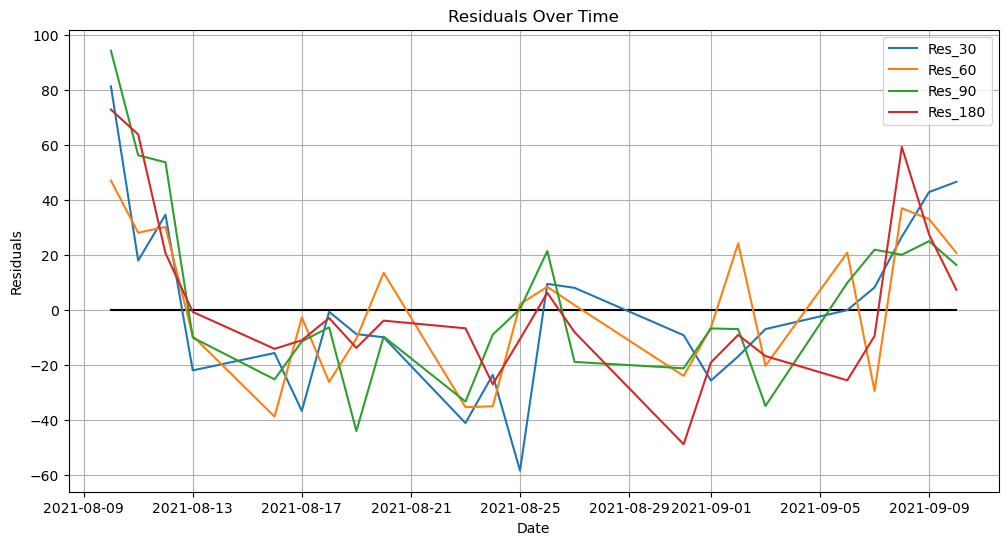

In [ ]:
data_cleaned = data_gold[data_gold['Date'] != 'abs']
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], np.zeros(len(data_cleaned['Res_30'])),color='black')
plt.plot(data_cleaned['Date'], data_cleaned['Res_30'], label='Res_30')
plt.plot(data_cleaned['Date'], data_cleaned['Res_60'], label='Res_60')
plt.plot(data_cleaned['Date'], data_cleaned['Res_90'], label='Res_90')
plt.plot(data_cleaned['Date'], data_cleaned['Res_180'], label='Res_180')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Over Time')
plt.legend()
plt.grid()
plt.show()

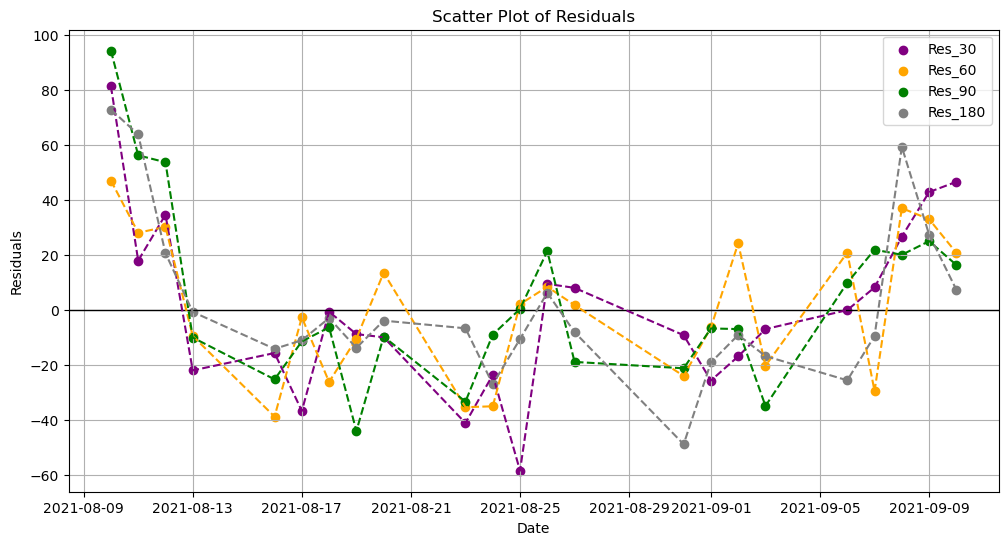

In [ ]:
plt.figure(figsize=(12, 6))

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.scatter(data_cleaned['Date'], data_cleaned['Res_30'], label='Res_30', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Res_30'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_60'], label='Res_60', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Res_60'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_90'], label='Res_90', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Res_90'], linestyle='--', color='green')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_180'], label='Res_180', color='gray')
plt.plot(data_cleaned['Date'], data_cleaned['Res_180'], linestyle='--', color='gray')

# Add labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

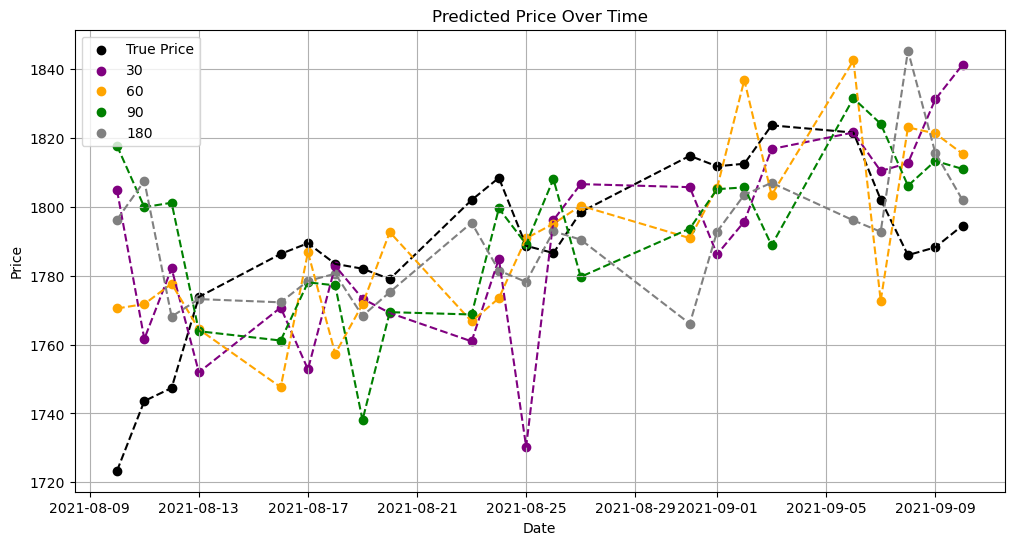

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['Date'], data_cleaned['USD (PM)'], label='True Price', color='black')
plt.plot(data_cleaned['Date'], data_cleaned['USD (PM)'], linestyle='--', color='black')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (30)'], label='30', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (30)'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (60)'], label='60', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (60)'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (90)'], label='90', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (90)'], linestyle='--', color='green')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (180)'], label='180', color='gray')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (180)'], linestyle='--', color='gray')


# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Price Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predicted_values_gold_30 = data_cleaned['Predicted Value (30)']
predicted_values_gold_60 = data_cleaned['Predicted Value (60)']
predicted_values_gold_90 = data_cleaned['Predicted Value (90)']
predicted_values_gold_180 = data_cleaned['Predicted Value (180)']

# Initialize a results list
results_gold_all = []

# Function to calculate metrics for a given prediction
def calculate_metrics(true_values, predicted_values, horizon):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    directional_accuracy = (np.sign(true_values.diff()) == np.sign(predicted_values.diff())).mean()
    return {'Horizon': horizon, 'MAE': mae, 'RMSE': rmse, 'R^2': r2, 'Directional Accuracy': directional_accuracy}

true_values_gold_new = data_cleaned['USD (PM)']

# Calculate for each horizon and append results
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_30, '30 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_60, '60 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_90, '90 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_180, '180 Days'))

# Convert results to a DataFrame
results_gold_all_df = pd.DataFrame(results_gold_all)
results_gold_all_df


,Horizon,MAE,RMSE,R^2,Directional Accuracy
0,30 Days,23.969752,30.991122,-0.650604,0.565217
1,60 Days,21.975122,25.433305,-0.111665,0.347826
2,90 Days,24.216987,31.999972,-0.759817,0.478261
3,180 Days,21.076539,29.143510,-0.459661,0.434783


In [12]:
url3 = 'C:\\Users\\86152\\Desktop\\Bit_new.xlsx'
data_cleaned = pd.read_excel(url3)

In [13]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

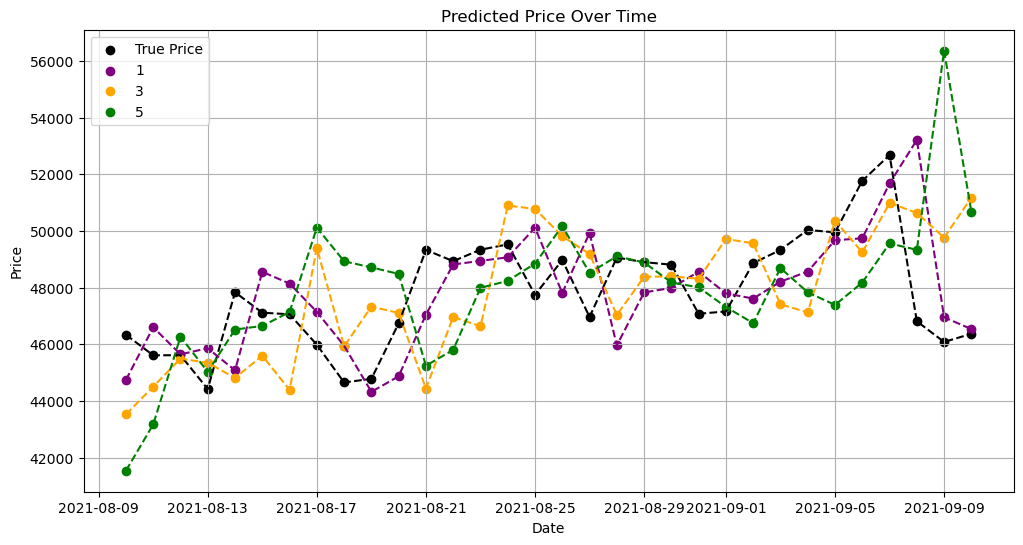

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['Date'], data_cleaned['Value'], label='True Price', color='black')
plt.plot(data_cleaned['Date'], data_cleaned['Value'], linestyle='--', color='black')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (1)'], label='1', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (1)'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (3)'], label='3', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (3)'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (5)'], label='5', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (5)'], linestyle='--', color='green')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Price Over Time')
plt.legend()
plt.grid()
plt.show()

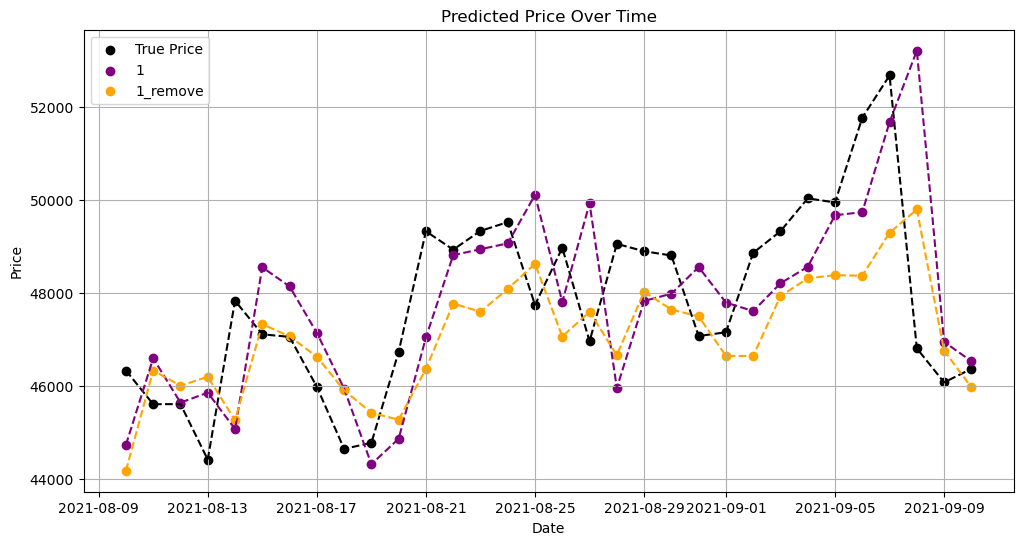

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['Date'], data_cleaned['Value'], label='True Price', color='black')
plt.plot(data_cleaned['Date'], data_cleaned['Value'], linestyle='--', color='black')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (1)'], label='1', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (1)'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (re)'], label='1_remove', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (re)'], linestyle='--', color='orange')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Price Over Time')
plt.legend()
plt.grid()
plt.show()

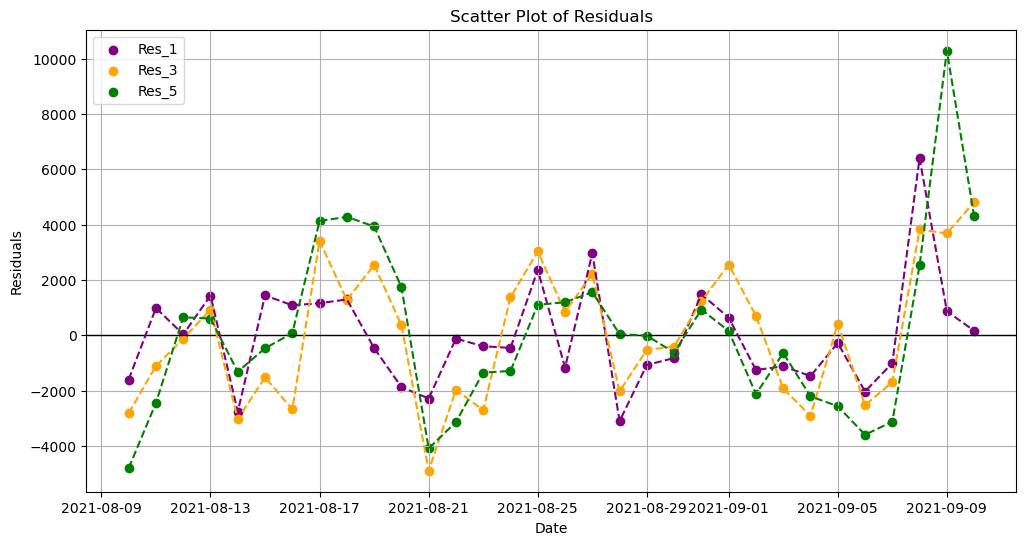

In [ ]:
plt.figure(figsize=(12, 6))

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.scatter(data_cleaned['Date'], data_cleaned['Res_1'], label='Res_1', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Res_1'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_3'], label='Res_3', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Res_3'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_5'], label='Res_5', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Res_5'], linestyle='--', color='green')


# Add labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

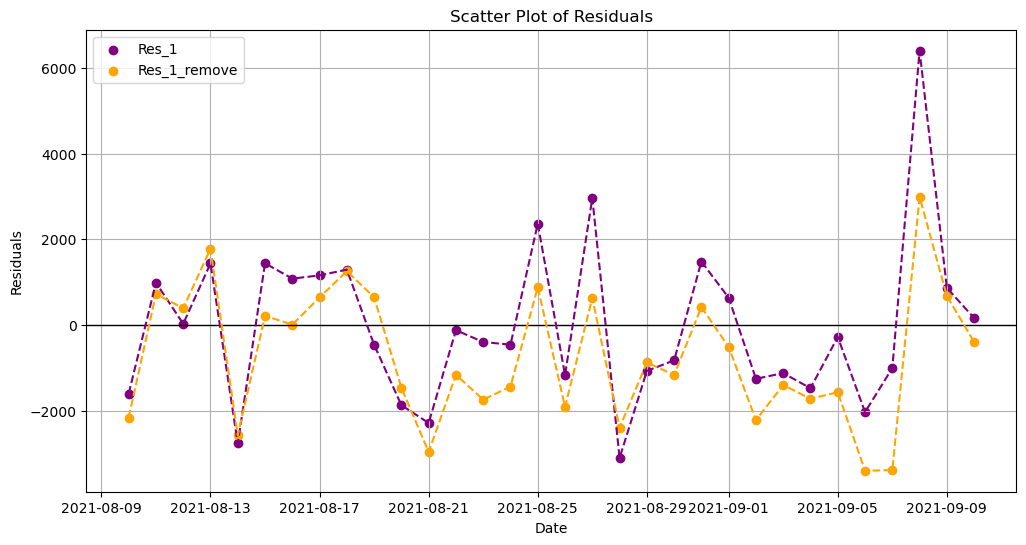

In [ ]:
plt.figure(figsize=(12, 6))

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.scatter(data_cleaned['Date'], data_cleaned['Res_1'], label='Res_1', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Res_1'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_re'], label='Res_1_remove', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Res_re'], linestyle='--', color='orange')

# Add labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predicted_values_bit_1 = data_cleaned['Predicted Value (1)']
predicted_values_bit_3 = data_cleaned['Predicted Value (3)']
predicted_values_bit_5 = data_cleaned['Predicted Value (5)']
predicted_values_bit_re = data_cleaned['Predicted Value (re)'] #remove first 1500 points
predicted_values_bit_re100 = data_cleaned['Predicted Value (re100)'] #remove first 1500 points and train 100 epochs
results_gold_all = []

def calculate_metrics(true_values, predicted_values, horizon):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    directional_accuracy = (np.sign(true_values.diff()) == np.sign(predicted_values.diff())).mean()
    return {'Horizon': horizon, 'MAE': mae, 'RMSE': rmse, 'R^2': r2, 'Directional Accuracy': directional_accuracy}

true_values_gold_new = data_cleaned['Value']
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_bit_1, '1 Day'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_bit_3, '3 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_bit_5, '5 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_bit_re, 'remove Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_bit_re100, 'remove Days 100 epoch'))

results_gold_all_df = pd.DataFrame(results_gold_all)
results_gold_all_df

,Horizon,MAE,RMSE,R^2,Directional Accuracy
0,1 Day,1424.027031,1858.187612,0.094964,0.37500
1,3 Days,2064.039969,2413.008448,-0.526175,0.43750
2,5 Days,2227.614156,3018.819131,-1.388696,0.53125
3,remove Days,1427.327906,1702.566218,0.240208,0.34375
4,remove Days 100 epoch,1252.611688,1760.505950,0.187615,0.43750


In [19]:
url4 = 'C:\\Users\\86152\\Desktop\\Gold_new.xlsx'
data_gold = pd.read_excel(url4)

In [ ]:
data_cleaned = data_gold[data_gold['Date'] != 'abs']
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

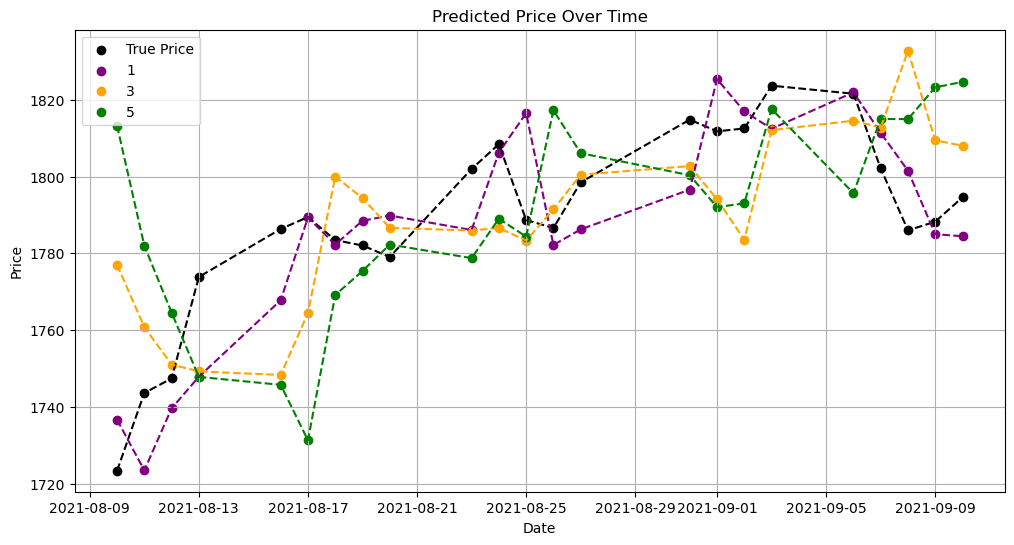

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['Date'], data_cleaned['USD (PM)'], label='True Price', color='black')
plt.plot(data_cleaned['Date'], data_cleaned['USD (PM)'], linestyle='--', color='black')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (1)'], label='1', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (1)'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (3)'], label='3', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (3)'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Predicted Value (5)'], label='5', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Predicted Value (5)'], linestyle='--', color='green')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted Price Over Time')
plt.legend()
plt.grid()

# Show the plot
plt.show()

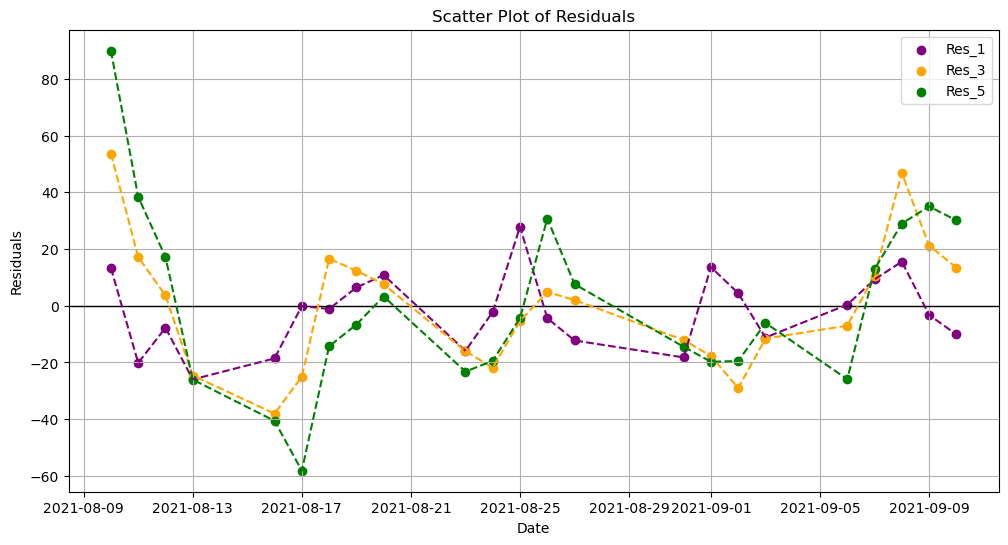

In [ ]:
plt.figure(figsize=(12, 6))

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

plt.scatter(data_cleaned['Date'], data_cleaned['Res_1'], label='Res_1', color='purple')
plt.plot(data_cleaned['Date'], data_cleaned['Res_1'], linestyle='--', color='purple')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_3'], label='Res_3', color='orange')
plt.plot(data_cleaned['Date'], data_cleaned['Res_3'], linestyle='--', color='orange')
plt.scatter(data_cleaned['Date'], data_cleaned['Res_5'], label='Res_5', color='green')
plt.plot(data_cleaned['Date'], data_cleaned['Res_5'], linestyle='--', color='green')

# Add labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Residuals')
plt.legend()
plt.grid()
plt.show()

In [23]:
predicted_values_gold_1 = data_cleaned['Predicted Value (1)']
predicted_values_gold_3 = data_cleaned['Predicted Value (3)']
predicted_values_gold_5 = data_cleaned['Predicted Value (5)']
predicted_values_gold_100 = data_cleaned[100]
predicted_values_gold_re = data_cleaned['remove']

results_gold_all = []
def calculate_metrics(true_values, predicted_values, horizon):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    directional_accuracy = (np.sign(true_values.diff()) == np.sign(predicted_values.diff())).mean()
    return {'Horizon': horizon, 'MAE': mae, 'RMSE': rmse, 'R^2': r2, 'Directional Accuracy': directional_accuracy}

true_values_gold_new = data_cleaned['USD (PM)']
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_1, '1 Day'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_3, '3 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_5, '5 Days'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_100, '100 epoch'))
results_gold_all.append(calculate_metrics(true_values_gold_new, predicted_values_gold_re, 'remove'))
results_gold_all_df = pd.DataFrame(results_gold_all)
results_gold_all_df

,Horizon,MAE,RMSE,R^2,Directional Accuracy
0,1 Day,10.997900,13.401313,0.691352,0.478261
1,3 Days,18.182139,22.417199,0.136363,0.434783
2,5 Days,24.892626,31.337695,-0.687728,0.391304
3,100 epoch,10.763735,13.246938,0.698422,0.478261
4,remove,11.282383,13.914840,0.667245,0.565217
